# Clustering by metadata

This notebook examines how the data clusters by metadata. We would expect that the data cluster by strain type (PAO1 and PA14).

In [1]:
import os
import pandas as pd
from sklearn.decomposition import PCA
import umap
import plotnine as pn
from core_acc_modules import paths_corr

In [2]:
# Load expression data
expression_pao1_df = pd.read_csv(paths_corr.PAO1_GE, sep="\t", index_col=0, header=0)
expression_pa14_df = pd.read_csv(paths_corr.PA14_GE, sep="\t", index_col=0, header=0)

In [3]:
# Load metadata
pao1_metadata = pd.read_csv(paths_corr.PAO1_METADATA, index_col=0, header=0)
pa14_metadata = pd.read_csv(paths_corr.PA14_METADATA, index_col=0, header=0)

In [4]:
# Select meatadata variable to color by
metadata_variable = "genotype"
# metadata_variable = 'processing'

In [5]:
print(expression_pao1_df.shape)
expression_pao1_df.head()

(76, 5685)


,PGD134012,PGD134018,PGD134020,PGD134022,PGD134024,PGD134014,PGD134016,PGD134026,PGD134030,PGD134032,...,PGD133904,PGD133906,PGD133902,PGD133898,PGD133900,PGD133894,PGD133896,PGD133892,PGD133884,PGD133886
SRR2007333,16.748607,14.158337,21.634927,13.909423,1.788972,11.595190,0.357876,3.351434,20.005435,5.510585,...,72.733456,18.647072,14.590614,13.044588,14.853692,0.386506,1.771919,20.724064,58.741668,2586.632135
SRR8782928,69.982152,97.099262,87.449079,92.622825,13.779231,16.745594,4.421613,29.401579,68.994721,16.728675,...,323.603134,78.706919,183.358555,59.153266,50.738176,4.374359,42.394929,206.900132,818.025789,17618.048842
SRR8782932,43.671292,108.945058,31.600408,82.412376,9.481706,11.838603,4.957598,14.083611,30.924667,6.076368,...,50.626168,32.018869,71.347316,24.624295,16.342457,0.505114,9.933001,58.245928,397.133760,13079.049466
SRR12820672,30.021631,52.560065,26.536402,22.785072,18.115482,33.277848,2.962978,3.960106,8.609682,11.000073,...,137.505075,25.786259,24.032927,12.251220,26.211311,13.853613,7.087961,28.110579,552.090025,16939.944456
SRR12820655,56.445619,95.522156,27.881456,51.173257,21.218700,22.894728,7.746194,11.421012,14.734453,12.572734,...,133.140124,68.884391,26.866753,26.074096,28.517417,13.796927,9.017056,36.933886,576.759379,5803.250581


In [6]:
print(expression_pa14_df.shape)
expression_pa14_df.head()

(72, 5959)


,PGD1650835,PGD1650837,PGD1650839,PGD1650841,PGD1650843,PGD1650845,PGD1650847,PGD1650849,PGD1650851,PGD1650853,...,PGD1662756,PGD1662758,PGD1662760,PGD1662762,PGD1662764,PGD1662766,PGD1662768,PGD1662770,PGD1662772,PGD1662774
SRR2007333,19.180637,14.826195,24.131154,16.056883,2.002311,13.526643,0.381704,3.560882,21.673591,2.857113,...,94.795413,85.258835,18.035524,15.917066,14.053655,16.963548,0.458045,2.099885,24.809235,69.614206
SRR8782928,73.582573,101.844786,92.348509,97.004654,14.409954,17.512096,4.871090,30.804382,72.152844,17.494404,...,1270.691399,338.415551,82.309603,192.132716,65.109910,53.185852,5.718235,45.301303,217.615756,855.469616
SRR8782932,51.156559,127.344827,37.345608,96.483347,11.066872,13.817798,5.841005,16.878830,36.436288,7.092224,...,634.673494,59.089924,37.882025,83.275263,29.343978,19.074613,0.589559,11.949246,68.625425,463.527156
SRR12820672,46.574023,81.721619,41.297282,35.434459,28.187191,51.834587,4.604410,6.142189,13.343028,17.055988,...,192.253490,214.182086,40.007529,37.689918,19.023146,40.748407,20.089609,11.001673,43.746154,1328.925689
SRR12820655,83.016838,140.830409,41.111212,75.397345,31.295142,33.735651,11.376756,16.860138,21.693714,18.483932,...,192.269037,196.286158,101.384628,39.684716,38.370964,42.061050,19.038773,13.259394,54.439046,1097.015428


## Parse metadata

## Plot in PCA space

In [7]:
# Embed expression data into low dimensional space
pca = PCA(n_components=2)
model = pca.fit(expression_pao1_df)
pao1_encoded = model.transform(expression_pao1_df)

pao1_encoded_df = pd.DataFrame(
    data=pao1_encoded, index=expression_pao1_df.index, columns=["1", "2"]
)

# Add label
if metadata_variable == "genotype":
    pa14_ids = list(pa14_metadata.index)
    pao1_encoded_df["genotype"] = "PAO1"
    pao1_encoded_df.loc[pa14_ids, "genotype"] = "PA14"
elif metadata_variable == "processing":
    pao1_ids = list(pao1_metadata.index)
    pa14_ids = list(pa14_metadata.index)
    pao1_encoded_df.loc[pao1_ids, "processing"] = pao1_metadata.loc[
        pao1_ids, "LibrarySelection"
    ].values
    pao1_encoded_df.loc[pa14_ids, "processing"] = pa14_metadata.loc[
        pa14_ids, "LibrarySelection"
    ].values

pao1_encoded_df.head()

,1,2,genotype
SRR2007333,100192.710278,-125335.596850,PAO1
SRR8782928,22624.486672,-106008.425829,PA14
SRR8782932,19648.870233,-109449.888848,PA14
SRR12820672,-81646.632434,37548.210785,PAO1
SRR12820655,-75857.344635,29917.456882,PAO1


In [8]:
model = pca.fit(expression_pa14_df)
pa14_encoded = model.transform(expression_pa14_df)

pa14_encoded_df = pd.DataFrame(
    data=pa14_encoded, index=expression_pa14_df.index, columns=["1", "2"]
)

# Add label
if metadata_variable == "genotype":
    pa14_ids = list(pa14_metadata.index)
    pa14_encoded_df["genotype"] = "PAO1"
    pa14_encoded_df.loc[pa14_ids, "genotype"] = "PA14"
elif metadata_variable == "processing":
    pao1_ids = list(pao1_metadata.index)
    pa14_ids = list(pa14_metadata.index)
    pa14_encoded_df.loc[pao1_ids, "processing"] = pao1_metadata.loc[
        pao1_ids, "LibrarySelection"
    ].values
    pa14_encoded_df.loc[pa14_ids, "processing"] = pa14_metadata.loc[
        pa14_ids, "LibrarySelection"
    ].values

pa14_encoded_df.head()

,1,2,genotype
SRR2007333,269138.805260,4991.942727,PAO1
SRR8782928,-22042.535697,60117.974610,PA14
SRR8782932,25949.878524,-5325.156830,PA14
SRR12820672,-56551.008902,-34375.198997,PAO1
SRR12820655,-55473.937045,-15409.301495,PAO1


/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


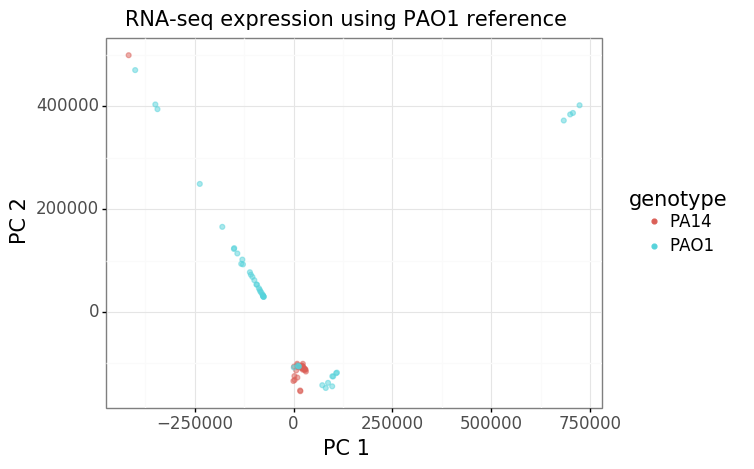

<ggplot: (8729899464901)>


In [9]:
# Plot PAO1
fig = pn.ggplot(pao1_encoded_df, pn.aes(x="1", y="2"))
fig += pn.geom_point(pn.aes(color=metadata_variable), alpha=0.5)
fig += pn.labs(x="PC 1", y="PC 2", title="RNA-seq expression using PAO1 reference")
fig += pn.theme_bw()
fig += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=15),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=15),
    axis_text=pn.element_text(family="sans-serif", size=12),
    axis_title=pn.element_text(family="sans-serif", size=15),
)
fig += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))

print(fig)

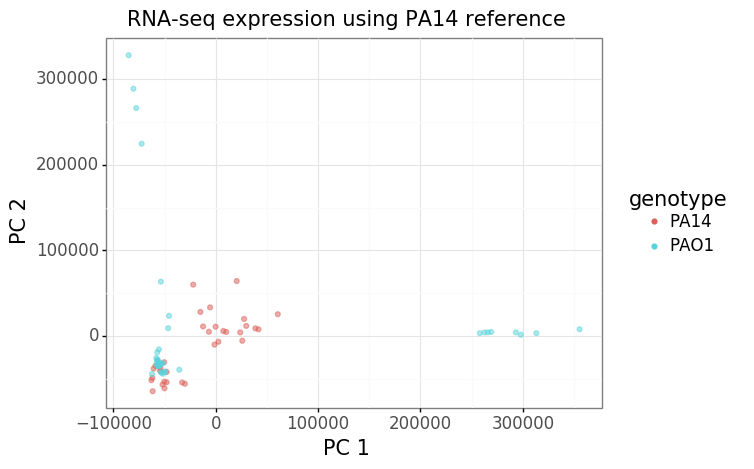

<ggplot: (8729899626173)>


In [11]:
# Plot PA14
fig = pn.ggplot(pa14_encoded_df, pn.aes(x="1", y="2"))
fig += pn.geom_point(pn.aes(color=metadata_variable), alpha=0.5)
fig += pn.labs(x="PC 1", y="PC 2", title="RNA-seq expression using PA14 reference")
fig += pn.theme_bw()
fig += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=15),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=15),
    axis_text=pn.element_text(family="sans-serif", size=12),
    axis_title=pn.element_text(family="sans-serif", size=15),
)
fig += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))

print(fig)

## Plot in UMAP

In [12]:
# Embed expression data into low dimensional space
model = umap.UMAP(random_state=123).fit(expression_pao1_df)
pao1_encoded = model.transform(expression_pao1_df)

pao1_encoded_df = pd.DataFrame(
    data=pao1_encoded, index=expression_pao1_df.index, columns=["1", "2"]
)

# Add label
if metadata_variable == "genotype":
    pa14_ids = list(pa14_metadata.index)
    pao1_encoded_df["genotype"] = "PAO1"
    pao1_encoded_df.loc[pa14_ids, "genotype"] = "PA14"
elif metadata_variable == "processing":
    pao1_ids = list(pao1_metadata.index)
    pa14_ids = list(pa14_metadata.index)
    pao1_encoded_df.loc[pao1_ids, "processing"] = pao1_metadata.loc[
        pao1_ids, "LibrarySelection"
    ].values
    pao1_encoded_df.loc[pa14_ids, "processing"] = pa14_metadata.loc[
        pa14_ids, "LibrarySelection"
    ].values

pao1_encoded_df.head()

,1,2,genotype
SRR2007333,0.778538,15.828184,PAO1
SRR8782928,6.398257,19.360540,PA14
SRR8782932,4.743871,20.814289,PA14
SRR12820672,2.029452,2.722019,PAO1
SRR12820655,1.927320,2.274927,PAO1


In [13]:
# Embed expression data into low dimensional space
model = umap.UMAP(random_state=123).fit(expression_pa14_df)
pa14_encoded = model.transform(expression_pa14_df)

pa14_encoded_df = pd.DataFrame(
    data=pa14_encoded, index=expression_pa14_df.index, columns=["1", "2"]
)

# Add label
if metadata_variable == "genotype":
    pa14_ids = list(pa14_metadata.index)
    pa14_encoded_df["genotype"] = "PAO1"
    pa14_encoded_df.loc[pa14_ids, "genotype"] = "PA14"
elif metadata_variable == "processing":
    pao1_ids = list(pao1_metadata.index)
    pa14_ids = list(pa14_metadata.index)
    pa14_encoded_df.loc[pao1_ids, "processing"] = pao1_metadata.loc[
        pao1_ids, "LibrarySelection"
    ].values
    pa14_encoded_df.loc[pa14_ids, "processing"] = pa14_metadata.loc[
        pa14_ids, "LibrarySelection"
    ].values

pa14_encoded_df.head()

,1,2,genotype
SRR2007333,9.204292,-14.263848,PAO1
SRR8782928,10.555219,-7.865293,PA14
SRR8782932,11.128537,-9.102744,PA14
SRR12820672,12.464129,8.033609,PAO1
SRR12820655,12.358012,7.107989,PAO1


/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


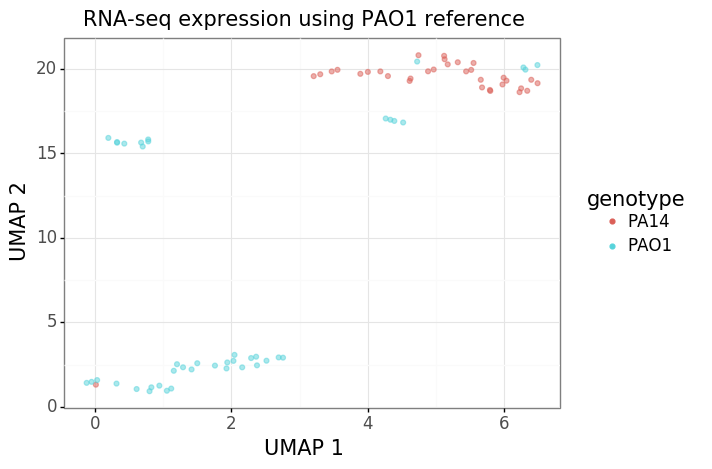

<ggplot: (8729896729241)>


In [14]:
# Plot PAO1
fig = pn.ggplot(pao1_encoded_df, pn.aes(x="1", y="2"))
fig += pn.geom_point(pn.aes(color=metadata_variable), alpha=0.5)
fig += pn.labs(x="UMAP 1", y="UMAP 2", title="RNA-seq expression using PAO1 reference")
fig += pn.theme_bw()
fig += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=15),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=15),
    axis_text=pn.element_text(family="sans-serif", size=12),
    axis_title=pn.element_text(family="sans-serif", size=15),
)
fig += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))

print(fig)

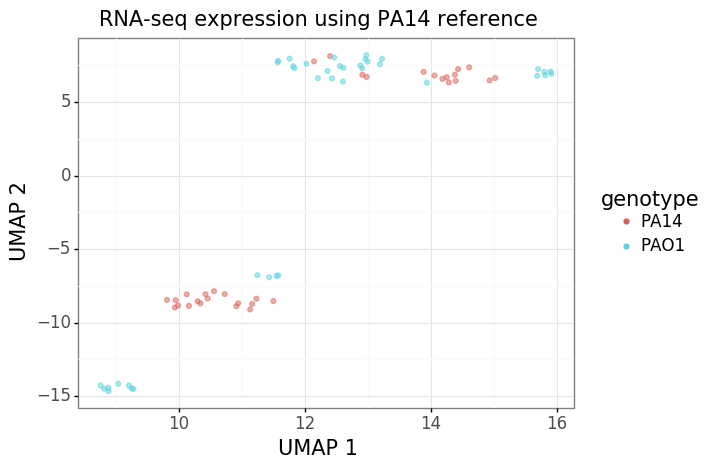

<ggplot: (8729899273789)>


In [15]:
# Plot PA14
fig = pn.ggplot(pa14_encoded_df, pn.aes(x="1", y="2"))
fig += pn.geom_point(pn.aes(color=metadata_variable), alpha=0.5)
fig += pn.labs(x="UMAP 1", y="UMAP 2", title="RNA-seq expression using PA14 reference")
fig += pn.theme_bw()
fig += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=15),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=15),
    axis_text=pn.element_text(family="sans-serif", size=12),
    axis_title=pn.element_text(family="sans-serif", size=15),
)
fig += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))

print(fig)

**Takeaway:**

* Looks like there is a pretty clear separation between PAO1 and PA14 strains using PAO1 reference. Looks like library selection could explain some of the variance found in using the PA14 reference.

* We will need to determine if this is something we will need to correct in our analysis or if these sources of variance will become noise with a larger dataset (i.e. the compendium that Georgia processed)

* Using raw TPM values the clustering looked like there is predominately clustering based on the biology that we care about (PAO1 vs PA14) but there is still some variance contributed by platform. For now I think TPM normalization appears sufficient for our purposes as pilot, but this may need to be revisited in the future